In [3]:
import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn import svm, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
Y = iris["target"]
yellow_or_blue = (Y== 0) | (Y == 1)
X = X[yellow_or_blue]
Y = Y[yellow_or_blue]

svc = Pipeline([("scaler", StandardScaler()), ("linear_svc", LinearSVC(C=1, loss="hinge")),])
svc.fit(X,Y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [135]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.5)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "rs")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [71]:
svc.predict([[1,1]])

array([0])

In [72]:
svc.predict([[2,4]])

array([1])

In [73]:
svc.predict([[3,0.75]])

array([1])

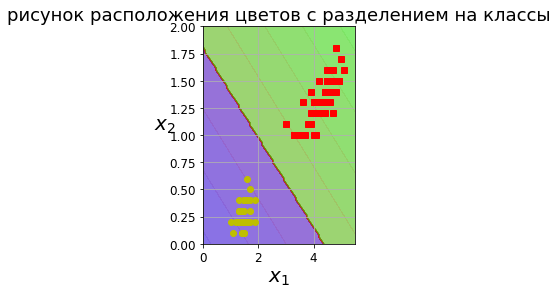

In [137]:
plt.subplot(121)
plot_predictions(svc, [0, 5.5,0, 2])
plot_dataset(X, Y, [0, 5.5,0, 2])
plt.title('рисунок расположения цветов с разделением на классы', fontsize=18)
plt.show()

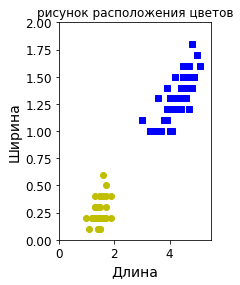

In [127]:

plt.subplot(122) 
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "yo")
plt.xlabel("Длина", fontsize=14)
plt.axis([0, 5.5,0, 2])
plt.ylabel('Ширина', fontsize=14)
plt.title('рисунок расположения цветов')
plt.show()

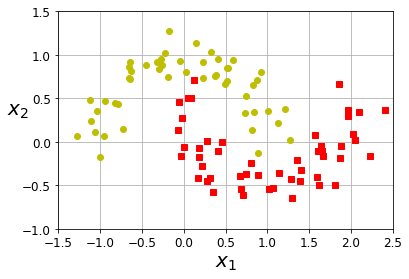

In [138]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [139]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

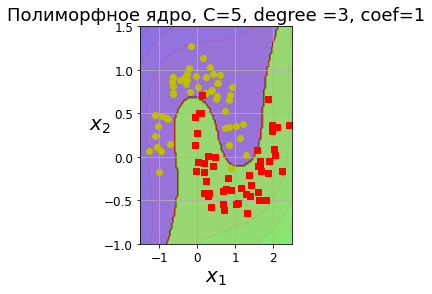

In [140]:

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Полиморфное ядро, C=5, degree =3, coef=1", fontsize=18)
plt.show()

In [141]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=100))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100, coef0=1, kernel='poly'))])

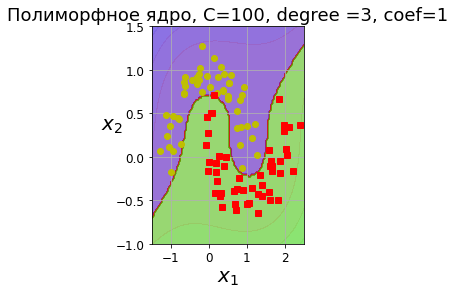

In [142]:
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Полиморфное ядро, C=100, degree =3, coef=1", fontsize=18)
plt.show()

In [143]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

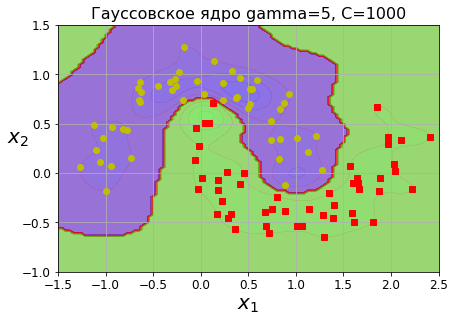

In [144]:
from sklearn.svm import SVC

gamma = 5
C = 1000

rbf_kernel_svm_clf = Pipeline([
         ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
rbf_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Гауссовское ядро gamma=5, C=1000", fontsize=16)

plt.show()